# Análise de Classificação sobre a Pesquisa de Satisfação da Central de Serviços de TI. (Base Pesquisa_Clientes2 - Satisfeito(1) Insatisfeito(0)

In [87]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt

In [88]:
dados = pd.read_csv("D:/pesquisa_clientes2.csv")

In [89]:
dados.head()

,clientes,canal,agilidade,atendimento,resolubilidade,Satisfacao
0,ADALBERTO DE MELLO,2.0,1,1,1,1
1,ADALBERTO DE PIERI GARCIA,1.0,2,2,1,1
2,ADALBERTO DE PIERI GARCIA,1.0,0,3,0,0
3,ADALBERTO DE PIERI GARCIA,3.0,1,2,0,0
4,ADALBERTO DE PIERI GARCIA,3.0,2,2,1,1


In [94]:
dados_dmy = pd.get_dummies(dados,columns=['canal', 'agilidade', 'atendimento', 'resolubilidade'], drop_first=True)
dados_dmy

,clientes,Satisfacao,canal_2.0,canal_3.0,agilidade_1,agilidade_2,atendimento_1,atendimento_2,atendimento_3,resolubilidade_1
0,ADALBERTO DE MELLO,1,1,0,1,0,1,0,0,1
1,ADALBERTO DE PIERI GARCIA,1,0,0,0,1,0,1,0,1
2,ADALBERTO DE PIERI GARCIA,0,0,0,0,0,0,0,1,0
3,ADALBERTO DE PIERI GARCIA,0,0,1,1,0,0,1,0,0
4,ADALBERTO DE PIERI GARCIA,1,0,1,0,1,0,1,0,1
5,ADALBERTO DE PIERI GARCIA,1,0,1,0,1,0,1,0,1
6,ADALBERTO DE PIERI GARCIA,1,1,0,0,1,0,1,0,1
7,ADALBERTO DE PIERI GARCIA,1,0,0,0,1,0,1,0,1
8,ADALBERTO DE PIERI GARCIA,1,0,1,0,1,0,1,0,1
9,ADAO DE OLIVEIRA COSTA,1,1,0,1,0,1,0,0,1


#Vamos agora transformar os atributos de valores categóricos em numéricos.

In [90]:
from sklearn import tree

In [95]:
X = dados_dmy[['canal_2.0','canal_3.0','agilidade_1','agilidade_2','atendimento_1','atendimento_2','atendimento_3','resolubilidade_1']] 
Y = dados_dmy['Satisfacao']

In [96]:
clf = tree.DecisionTreeClassifier()

In [97]:
# Uma linha de código e já treinamos a árvore
clf = clf.fit(X, Y)

In [98]:
from graphviz import Digraph
from graphviz import Source
def plot_tree(clf_tree,X_dataset):
    with open('tree.dot','w') as td:
        g = tree.export_graphviz(clf_tree, 
                                 out_file=td,
                                 feature_names=X_dataset.columns,
                                 class_names=["N","S"],
                                 filled=True,
                                 rounded=True)
        

    with open('tree.dot','r') as td:
        src = Source(td.read())

    return src

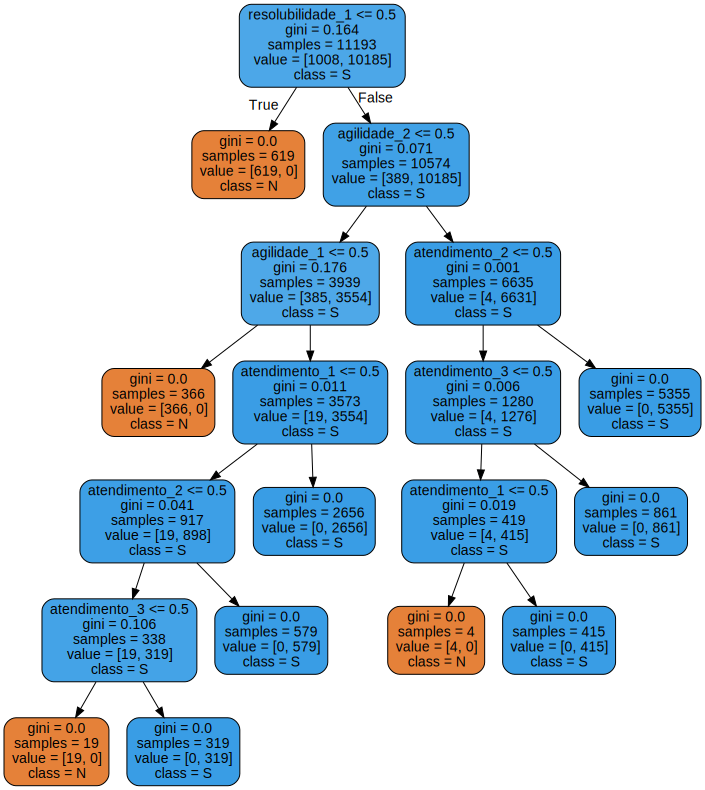

In [99]:
plot_tree(clf,X)

In [100]:
dados.corr()["Satisfacao"].sort_values()

canal            -0.042301
atendimento       0.294697
agilidade         0.618202
resolubilidade    0.769088
Satisfacao        1.000000
Name: Satisfacao, dtype: float64

In [101]:
#Explorar os Dados
dados.groupby(['atendimento', 'Satisfacao']).count()

clientes  canal  agilidade  resolubilidade
atendimento Satisfacao                                            
0           0                297    297        297             297
1           0                447    447        447             447
            1               3071   3070       3071            3071
2           0                126    126        126             126
            1               5934   5934       5934            5934
3           0                138    138        138             138
            1               1180   1180       1180            1180

In [102]:
dados.head()

,clientes,canal,agilidade,atendimento,resolubilidade,Satisfacao
0,ADALBERTO DE MELLO,2.0,1,1,1,1
1,ADALBERTO DE PIERI GARCIA,1.0,2,2,1,1
2,ADALBERTO DE PIERI GARCIA,1.0,0,3,0,0
3,ADALBERTO DE PIERI GARCIA,3.0,1,2,0,0
4,ADALBERTO DE PIERI GARCIA,3.0,2,2,1,1


In [103]:
dados.corr()["Satisfacao"].sort_values()

canal            -0.042301
atendimento       0.294697
agilidade         0.618202
resolubilidade    0.769088
Satisfacao        1.000000
Name: Satisfacao, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split

X = dados[["agilidade","resolubilidade"]]
y = dados["Satisfacao"]

x_treino, x_teste,y_treino, y_teste = train_test_split(X,
                                                       y,
                                                       test_size = .3,
                                                       random_state=25)

In [105]:
clf_dados = tree.DecisionTreeClassifier()

#Uma linha de treino 
clf_dados = clf_dados.fit(x_treino, y_treino)

In [106]:
predict = clf_dados.predict(x_teste)

In [107]:
from sklearn import metrics
print(metrics.confusion_matrix(y_teste,predict))

[[ 304   10]
 [   0 3044]]


In [108]:
#Validar Modelo
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       314
          1       1.00      1.00      1.00      3044

avg / total       1.00      1.00      1.00      3358



In [109]:
#Treinar Modelo
from sklearn.ensemble import RandomForestClassifier

rf_dados = RandomForestClassifier(random_state=42)


rf_dados = rf_dados.fit(x_treino, y_treino)

In [110]:
type(rf_dados)

sklearn.ensemble.forest.RandomForestClassifier

In [111]:
# Lista de árvores
list_trees = rf_dados.estimators_

In [112]:
type(list_trees[0])

sklearn.tree.tree.DecisionTreeClassifier

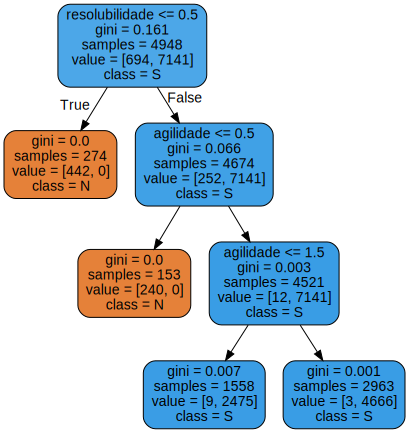

In [113]:
plot_tree(list_trees[0],x_treino)

In [114]:
predict = rf_dados.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

[[ 304   10]
 [   0 3044]]


In [115]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       314
          1       1.00      1.00      1.00      3044

avg / total       1.00      1.00      1.00      3358



In [116]:
oob =[]
n_estimators = list(range (2,60))
for i in n_estimators:
    rf_dados =RandomForestClassifier(oob_score=True, n_estimators=i, random_state=42)
    rf_dados = rf_dados.fit(x_treino, y_treino)
    oob.append(rf_dados.oob_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

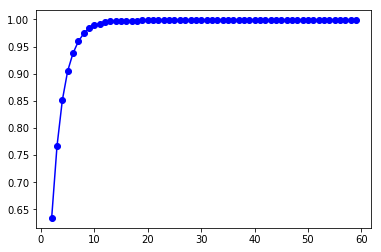

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(n_estimators,oob,'o-b')

In [118]:
max_oob = max(oob)
index_max_oob = oob.index(max_oob)
estimators = n_estimators[index_max_oob]

print("""OOB Score: {}
Estimators: {} """.format(max_oob,estimators))

OOB Score: 0.9983407785577537
Estimators: 22 


In [119]:
rf_dados_2 =RandomForestClassifier( n_estimators=estimators, random_state=42)
rf_dados_2 = rf_dados_2.fit(x_treino, y_treino)

In [120]:
predict = rf_dados_2.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

[[ 304   10]
 [   0 3044]]


In [121]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       314
          1       1.00      1.00      1.00      3044

avg / total       1.00      1.00      1.00      3358



In [122]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf_dados_2, x_treino, y_treino, cv=10)
mean_accuracy = sum(accuracy)/len(accuracy)

print("""Scores:{}
Mean:{}""".format(accuracy,mean_accuracy))

Scores:[0.99872611 0.99744898 0.99744898 0.99872449 1.         0.99744572
 0.99872286 0.99872286 0.99744572 0.99872286]
Mean:0.9983408589172056
